In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np

In [2]:
import csv

# Input and output file paths
input_file = 'household_power_consumption.txt'
output_file = 'household_power_consumption.csv'

# Read the input file and write to the output file with comma as delimiter
with open(input_file, 'r') as infile, open(output_file, 'w', newline='') as outfile:
    reader = csv.reader(infile, delimiter=';')
    writer = csv.writer(outfile, delimiter=',')
    
    for row in reader:
        writer.writerow(row)

print(f"File '{input_file}' has been converted to CSV format in '{output_file}'.") 

File 'household_power_consumption.txt' has been converted to CSV format in 'household_power_consumption.csv'.


DATA CLEANING

CLEANING

In [4]:
import pandas as pd
data = pd.read_csv("D:\House hold energy forecast\household_power_consumption.csv")
data.head()

<>:2: SyntaxWarning: invalid escape sequence '\H'
<>:2: SyntaxWarning: invalid escape sequence '\H'
C:\Users\sowmiya\AppData\Local\Temp\ipykernel_11580\1180342645.py:2: SyntaxWarning: invalid escape sequence '\H'
  data = pd.read_csv("D:\House hold energy forecast\household_power_consumption.csv")
C:\Users\sowmiya\AppData\Local\Temp\ipykernel_11580\1180342645.py:2: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("D:\House hold energy forecast\household_power_consumption.csv")


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
data.shape

(2075259, 9)

In [6]:
data.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [7]:
data.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [8]:
# Convert numeric columns from object to float
numeric_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 
                'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']

for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [9]:
data.dtypes

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [10]:
data.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [11]:
data.duplicated().sum()

np.int64(0)

In [12]:
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [13]:
# Convert 'Date' to datetime format if it is not already
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# Check the data type of 'Date'
print(data['Date'].dtype)

datetime64[ns]


In [14]:
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

# Check the first few rows to confirm
print(data[['Date', 'Day', 'Month', 'Year']].head())

        Date  Day  Month  Year
0 2006-12-16   16     12  2006
1 2006-12-16   16     12  2006
2 2006-12-16   16     12  2006
3 2006-12-16   16     12  2006
4 2006-12-16   16     12  2006


In [15]:
null_percent = data.isnull().mean() * 100


print("Null Value Percentage (All Columns):")
print(null_percent.sort_values(ascending=False))

Null Value Percentage (All Columns):
Global_reactive_power    1.251844
Global_active_power      1.251844
Global_intensity         1.251844
Voltage                  1.251844
Sub_metering_3           1.251844
Sub_metering_2           1.251844
Sub_metering_1           1.251844
Time                     0.000000
Date                     0.000000
Day                      0.000000
Month                    0.000000
Year                     0.000000
dtype: float64


In [16]:
df = data.dropna()  # Safe to remove without significant data loss

print(f"\nOriginal shape: {data.shape}")
print(f"Cleaned shape: {df.shape}")
print(f"Rows removed: {len(data)-len(df)} ({((len(data)-len(df))/len(data))*100:.2f}%)")


Original shape: (2075259, 12)
Cleaned shape: (2049280, 12)
Rows removed: 25979 (1.25%)


In [17]:
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Day                      0
Month                    0
Year                     0
dtype: int64

CORRELATION HEATMAP

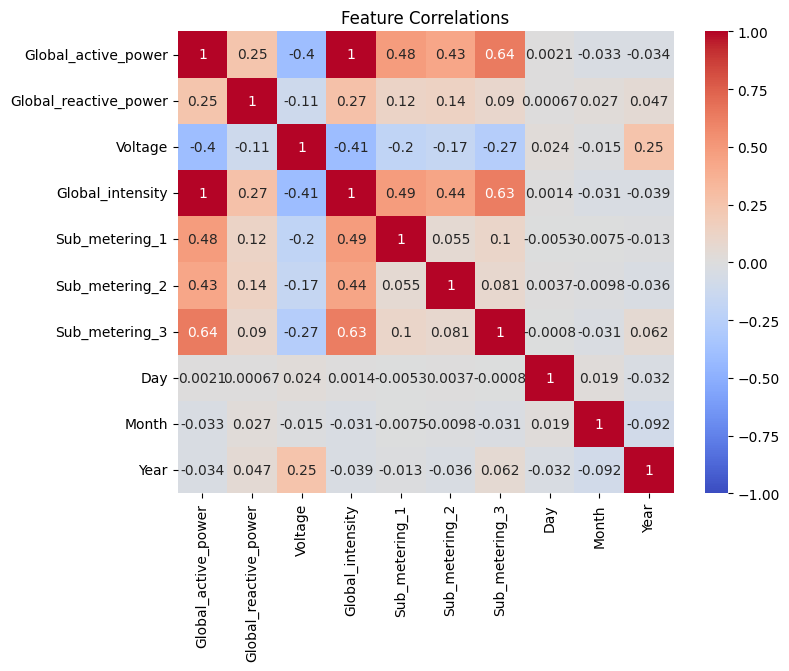


Top Correlations with Global Active Power:
Global_intensity    0.998889
Sub_metering_3      0.638555
Sub_metering_1      0.484401
Name: Global_active_power, dtype: float64


In [18]:
# Heatmap
plt.figure(figsize=(8, 6))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlations')
plt.show()

# Key correlations
print("\nTop Correlations with Global Active Power:")
print(corr['Global_active_power'].sort_values(ascending=False)[1:4])

SKEWNESS AND OUTLIERS

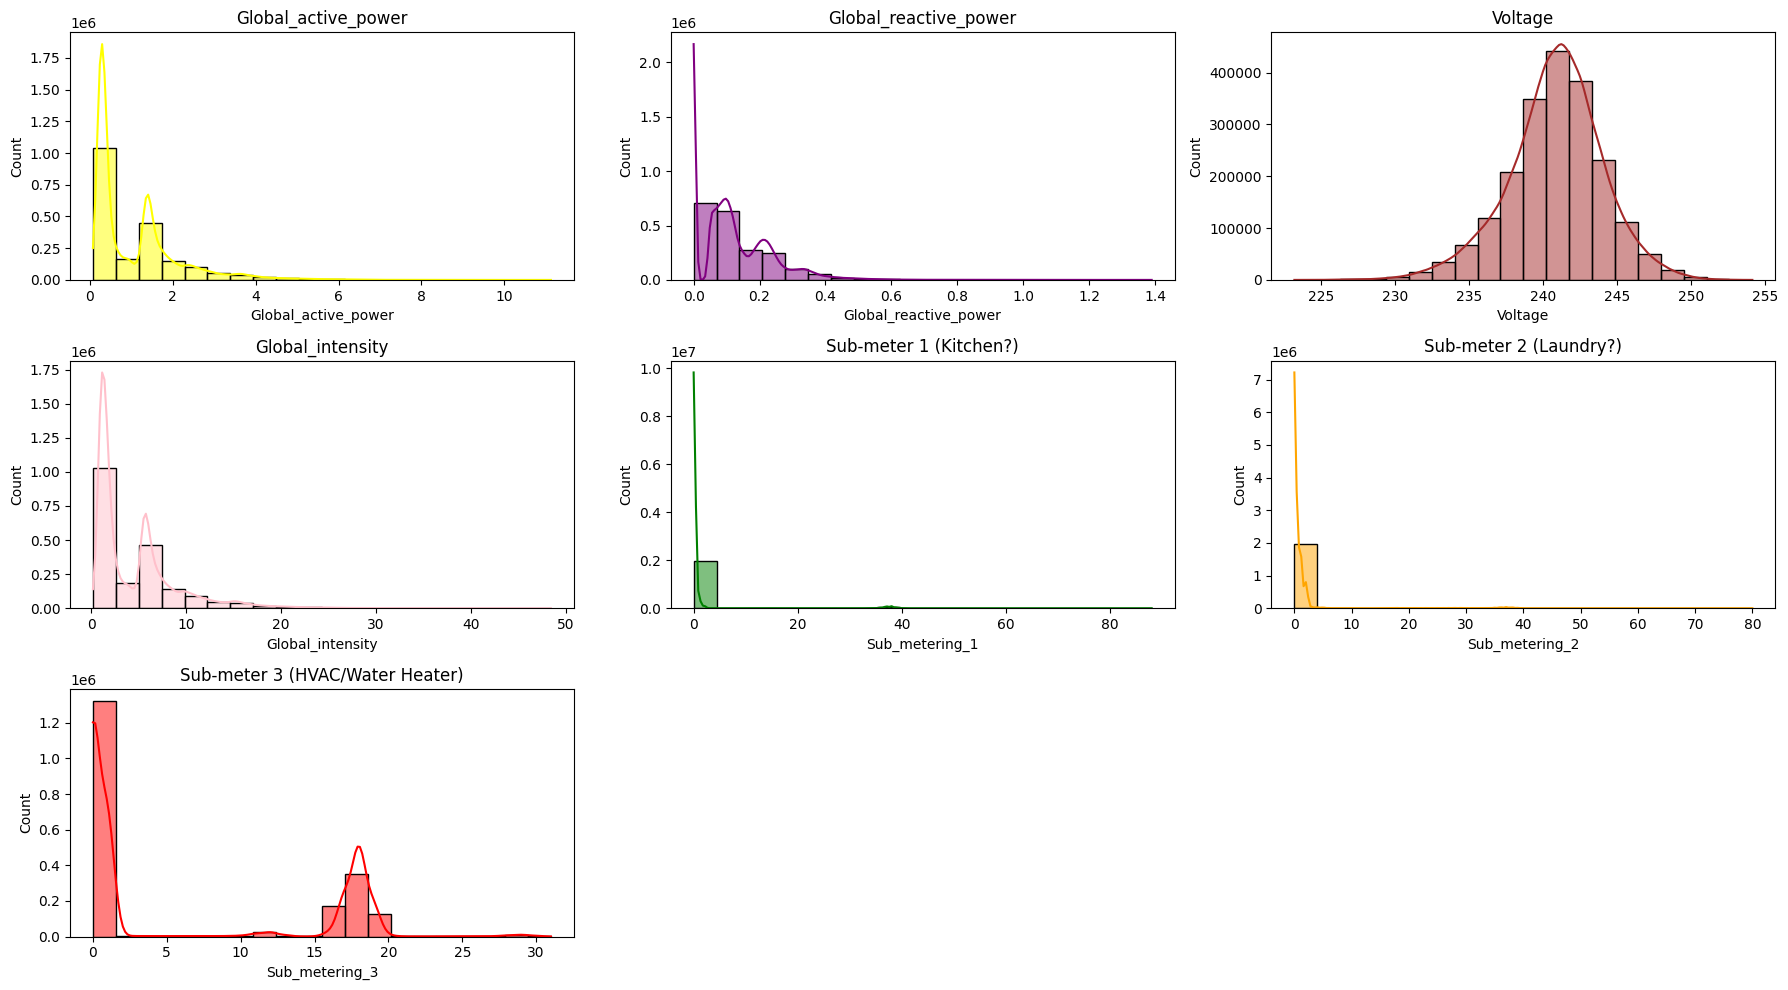

In [19]:
# List of columns to plot and their colors/titles
cols = [
    ('Global_active_power', 'yellow', 'Global_active_power'),
    ('Global_reactive_power', 'purple', 'Global_reactive_power'),
    ('Voltage', 'brown', 'Voltage'),
    ('Global_intensity', 'pink', 'Global_intensity'),
    ('Sub_metering_1', 'green', 'Sub-meter 1 (Kitchen?)'),
    ('Sub_metering_2', 'orange', 'Sub-meter 2 (Laundry?)'),
    ('Sub_metering_3', 'red', 'Sub-meter 3 (HVAC/Water Heater)')
]

# Setup subplot grid
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 10))
axes = axes.flatten()  # Flatten to easily index

# Plot each histogram
for i, (col, color, title) in enumerate(cols):
    sns.histplot(df[col].dropna(), bins=20, kde=True, color=color, ax=axes[i])
    axes[i].set_title(title)

# Hide any unused subplots
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])  # or use axes[j].set_visible(False)

plt.tight_layout()
plt.show()

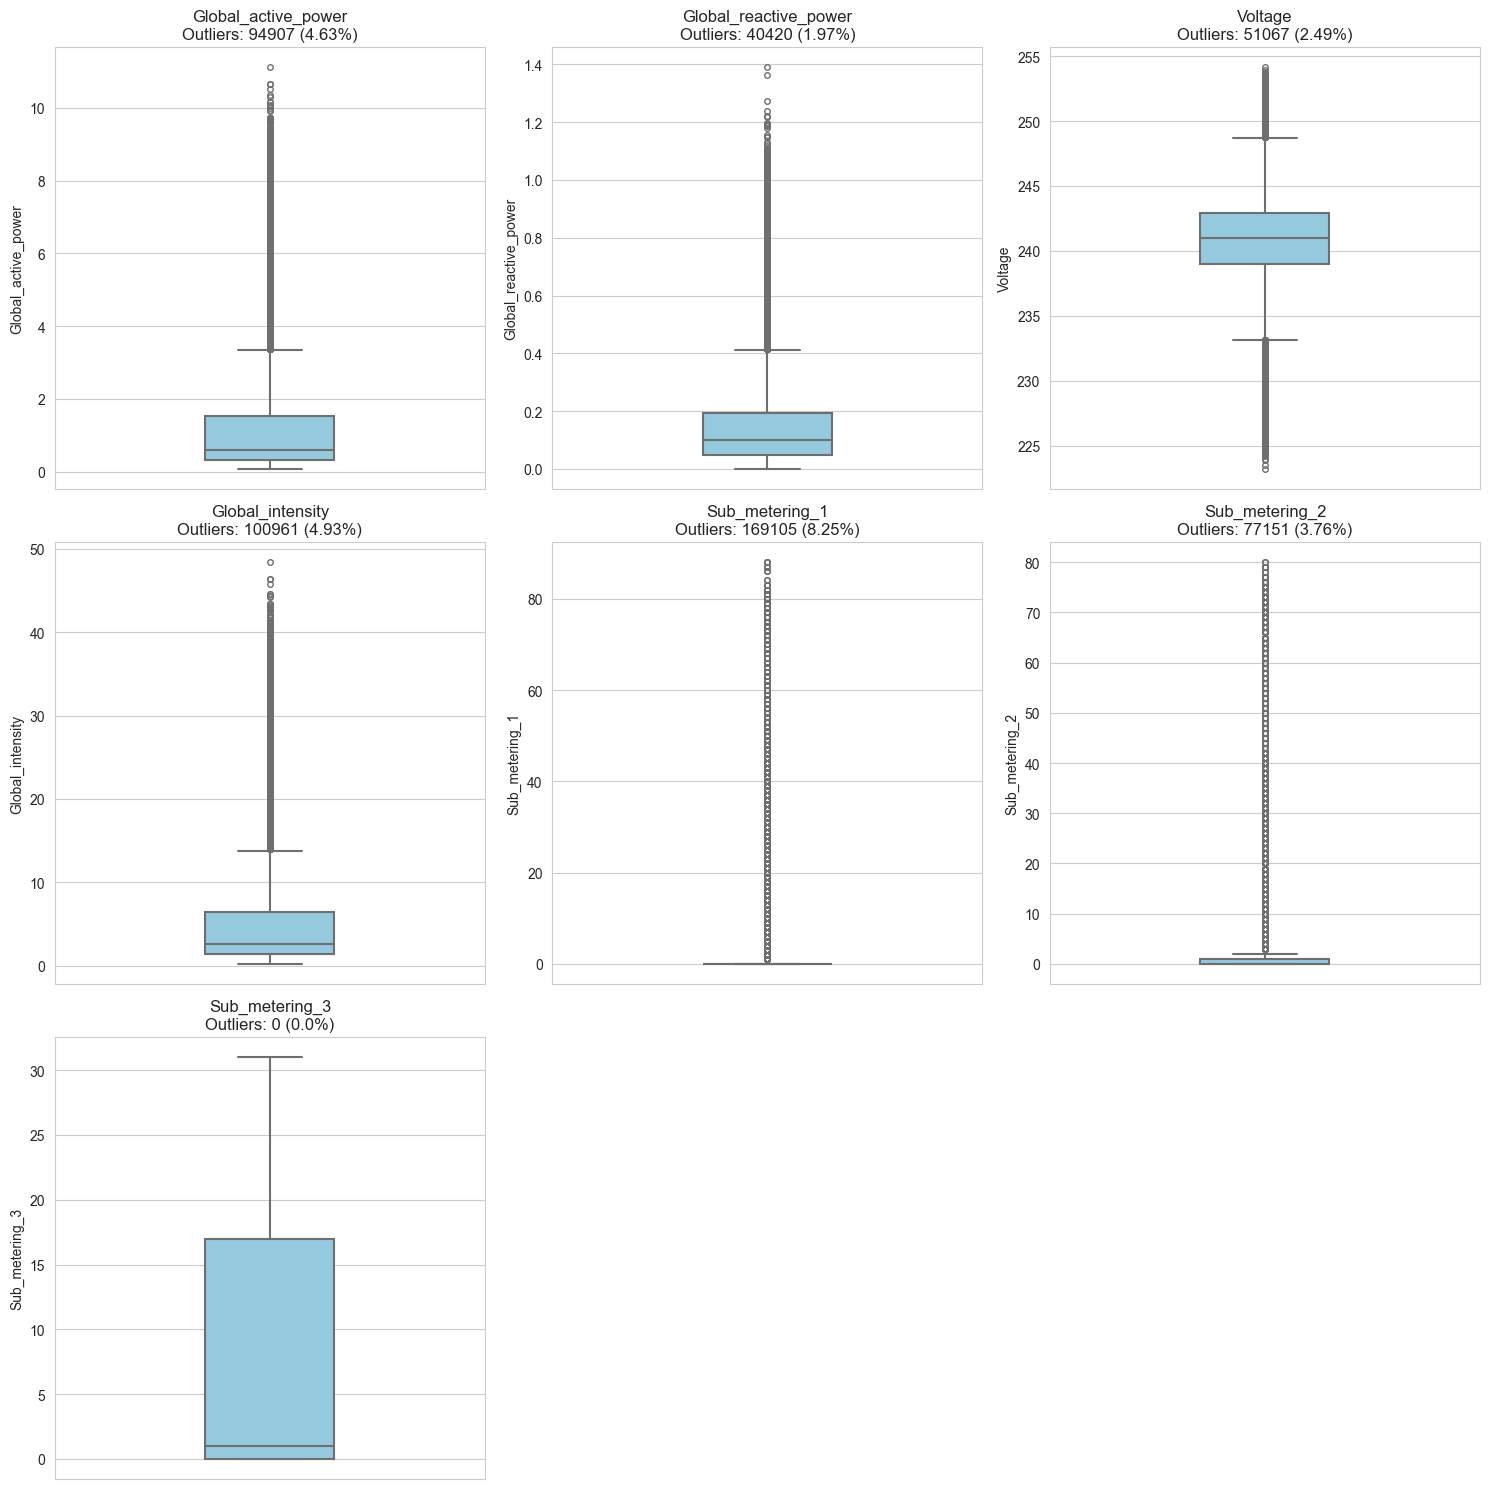

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Use only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Plot settings
sns.set_style("whitegrid")
n_cols = 3  # Number of plots per row
n_rows = -(-len(numeric_cols.columns) // n_cols)  # Ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(numeric_cols.columns):
    # Outlier calculation using IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    outlier_count = outliers.count()
    outlier_percent = round((outlier_count / len(df)) * 100, 2)

    # Plot boxplot
    sns.boxplot(y=df[col], ax=axes[i], color='skyblue', width=0.3, fliersize=4, linewidth=1.5)
    axes[i].set_title(f"{col}\nOutliers: {outlier_count} ({outlier_percent}%)", fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel(col)

# Hide empty subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

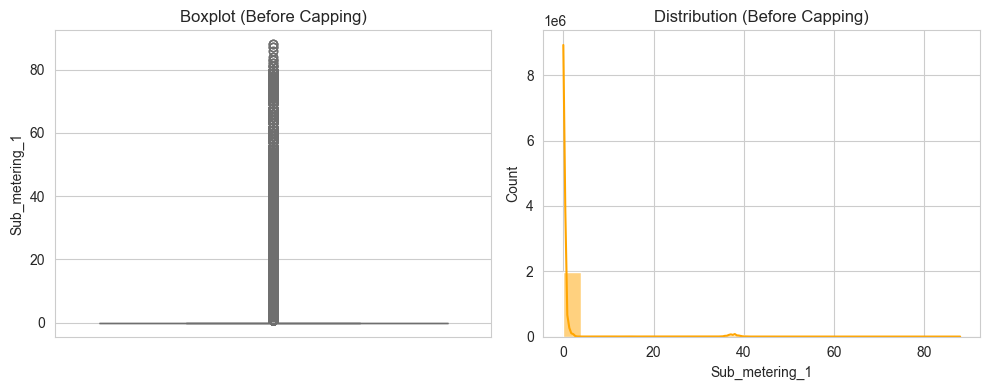

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='Sub_metering_1', color='skyblue')
plt.title('Boxplot (Before Capping)')

plt.subplot(1, 2, 2)
sns.histplot(df['Sub_metering_1'], kde=True, color='orange')
plt.title('Distribution (Before Capping)')
plt.tight_layout()
plt.show()

Capping

In [24]:
def cap_outliers(df, column, lower_percentile=0.5, upper_percentile=99.5):
    lower_bound = np.percentile(df[column], lower_percentile)
    upper_bound = np.percentile(df[column], upper_percentile)
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

df_capped = cap_outliers(df.copy(), 'Sub_metering_1')    

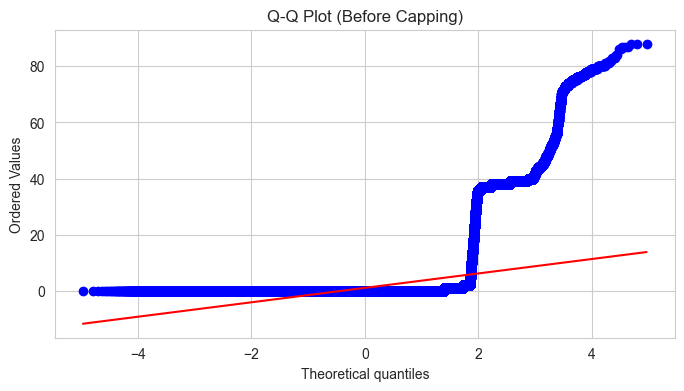

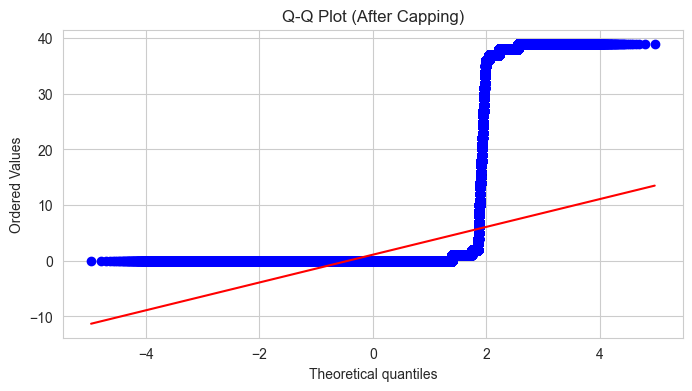

In [25]:
import scipy.stats as stats

plt.figure(figsize=(8, 4))
stats.probplot(df['Sub_metering_1'], dist='norm', plot=plt)
plt.title('Q-Q Plot (Before Capping)')

plt.figure(figsize=(8, 4))
stats.probplot(df_capped['Sub_metering_1'], dist='norm', plot=plt)
plt.title('Q-Q Plot (After Capping)')
plt.show()

In [26]:
df.columns
df.dtypes

Date                     datetime64[ns]
Time                             object
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
Day                               int32
Month                             int32
Year                              int32
dtype: object

In [27]:
columns_to_cap = [
    'Global_active_power', 'Global_reactive_power', 'Voltage',
    'Global_intensity', 'Sub_metering_2', 'Sub_metering_3'
]

def cap_outliers_iqr(df, columns):
    df_capped = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap values using bounds
        df_capped[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
        
        print(f"{col}: Outliers capped below {lower_bound:.2f} and above {upper_bound:.2f}")
    
    return df_capped

# Apply the function
df = cap_outliers_iqr(df, columns_to_cap)

Global_active_power: Outliers capped below -1.52 and above 3.36
Global_reactive_power: Outliers capped below -0.17 and above 0.41
Voltage: Outliers capped below 233.14 and above 248.74
Global_intensity: Outliers capped below -6.10 and above 13.90
Sub_metering_2: Outliers capped below -1.50 and above 2.50
Sub_metering_3: Outliers capped below -25.50 and above 42.50


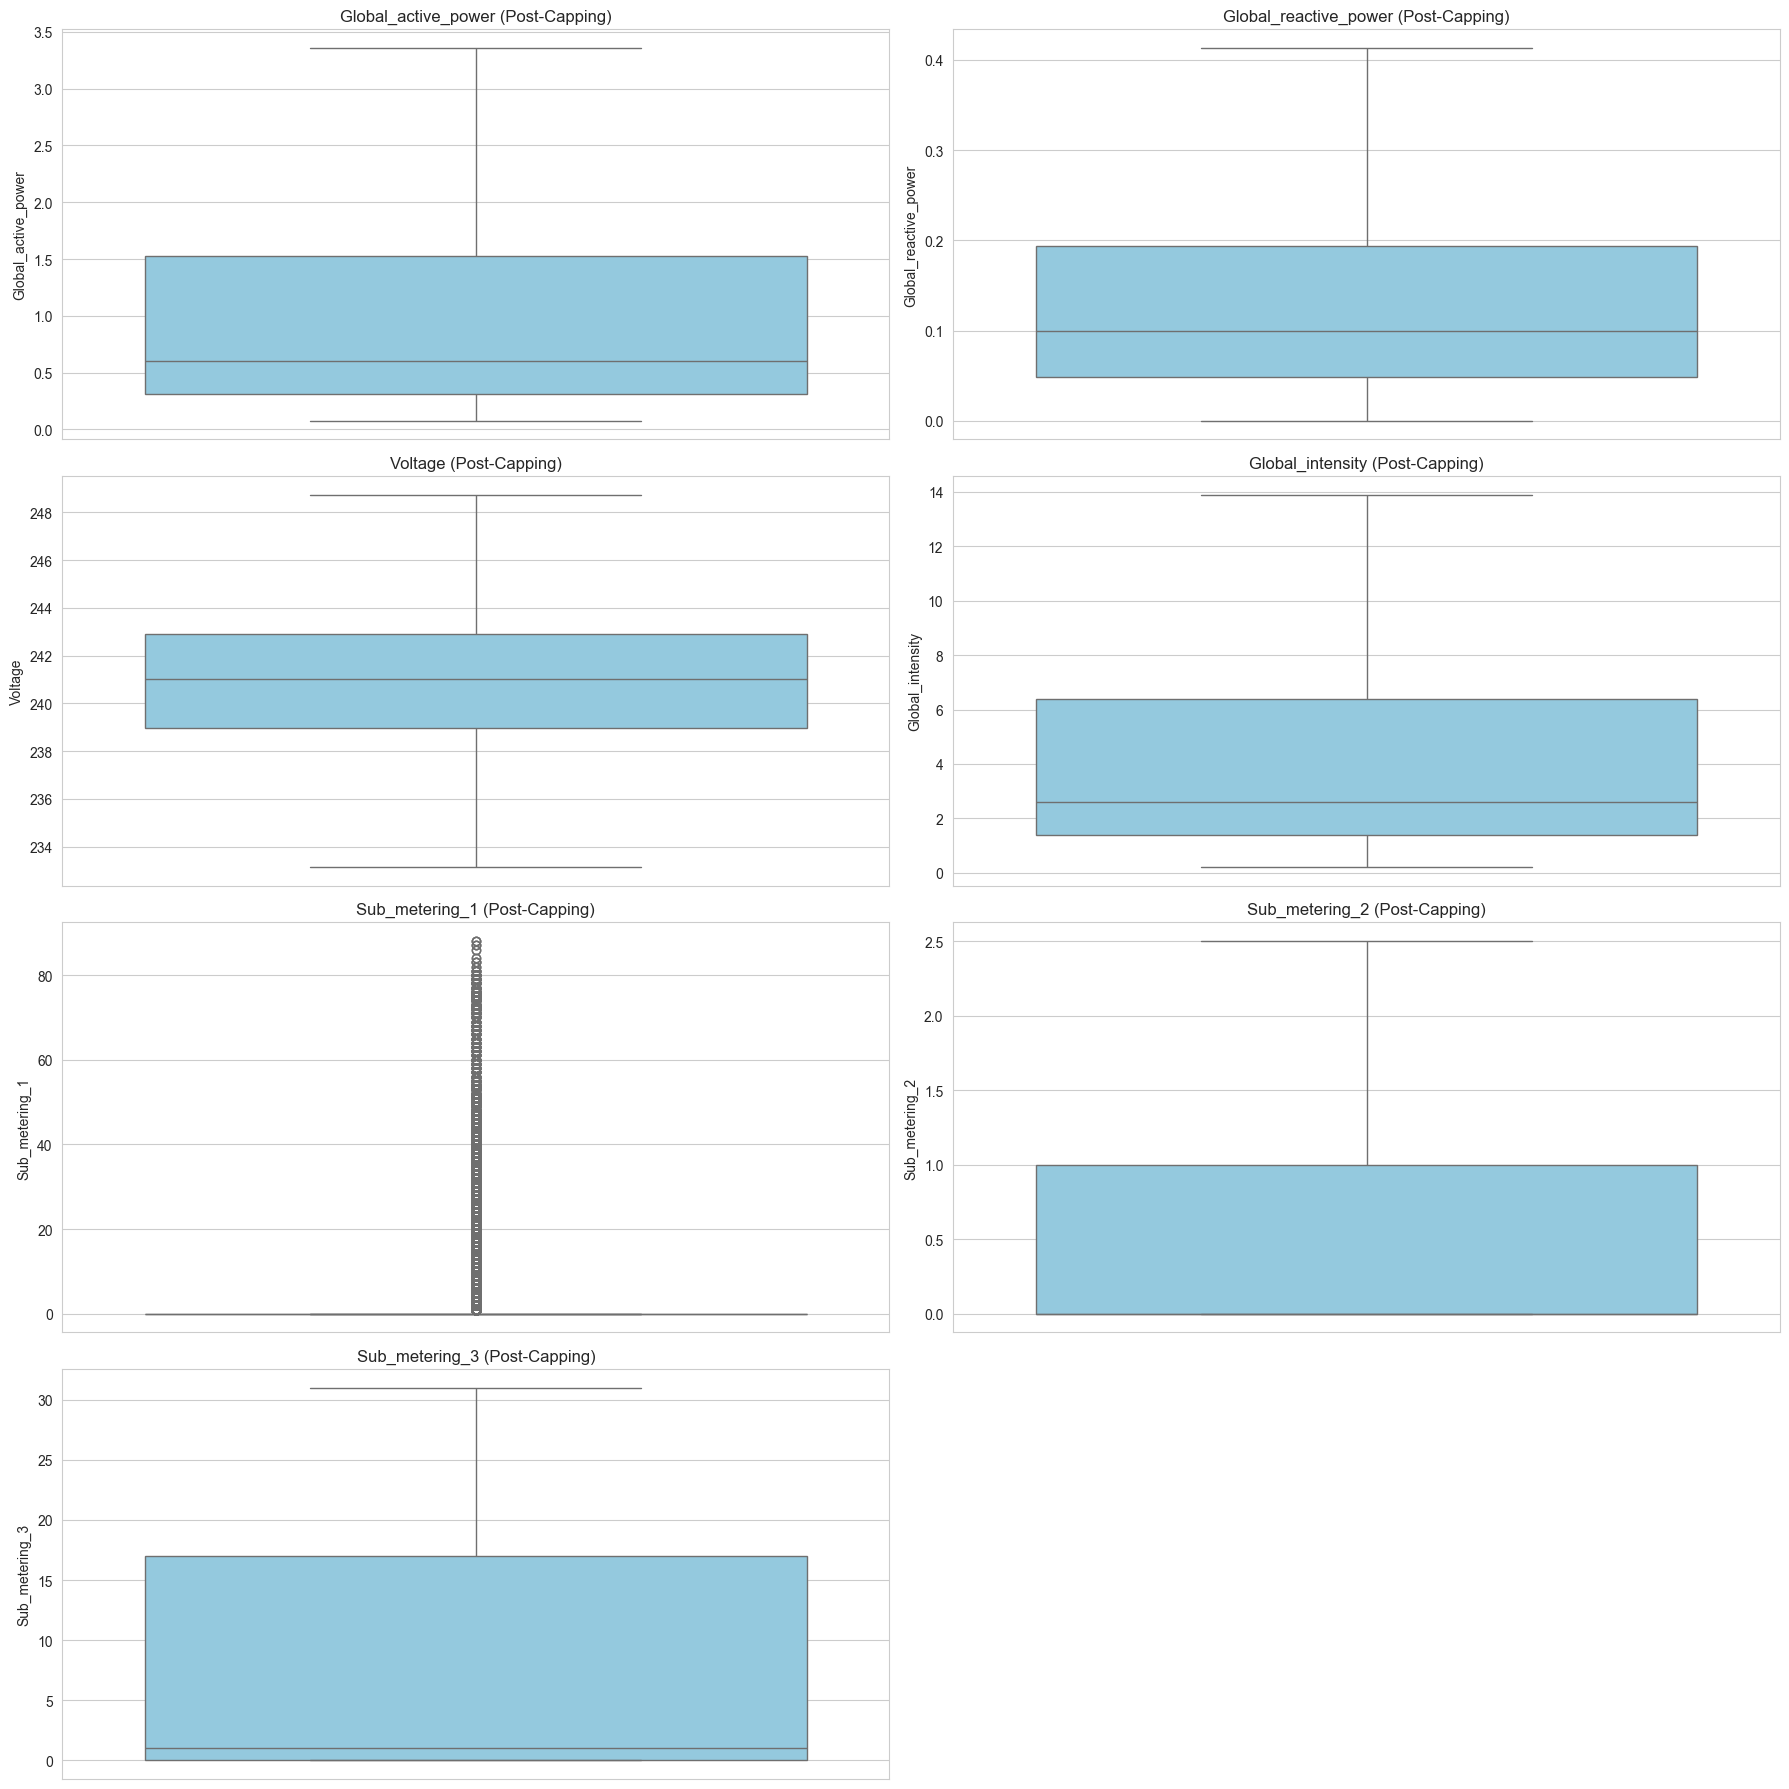

In [28]:
# List of columns to visualize
columns_to_plot = [
    'Global_active_power', 'Global_reactive_power', 'Voltage',
    'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'
]

# Set up the plot grid
plt.figure(figsize=(18, 18))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(data=df, y=col, color='skyblue')
    plt.title(f'{col} (Post-Capping)', fontsize=12)

plt.tight_layout()
plt.show()

Scaling

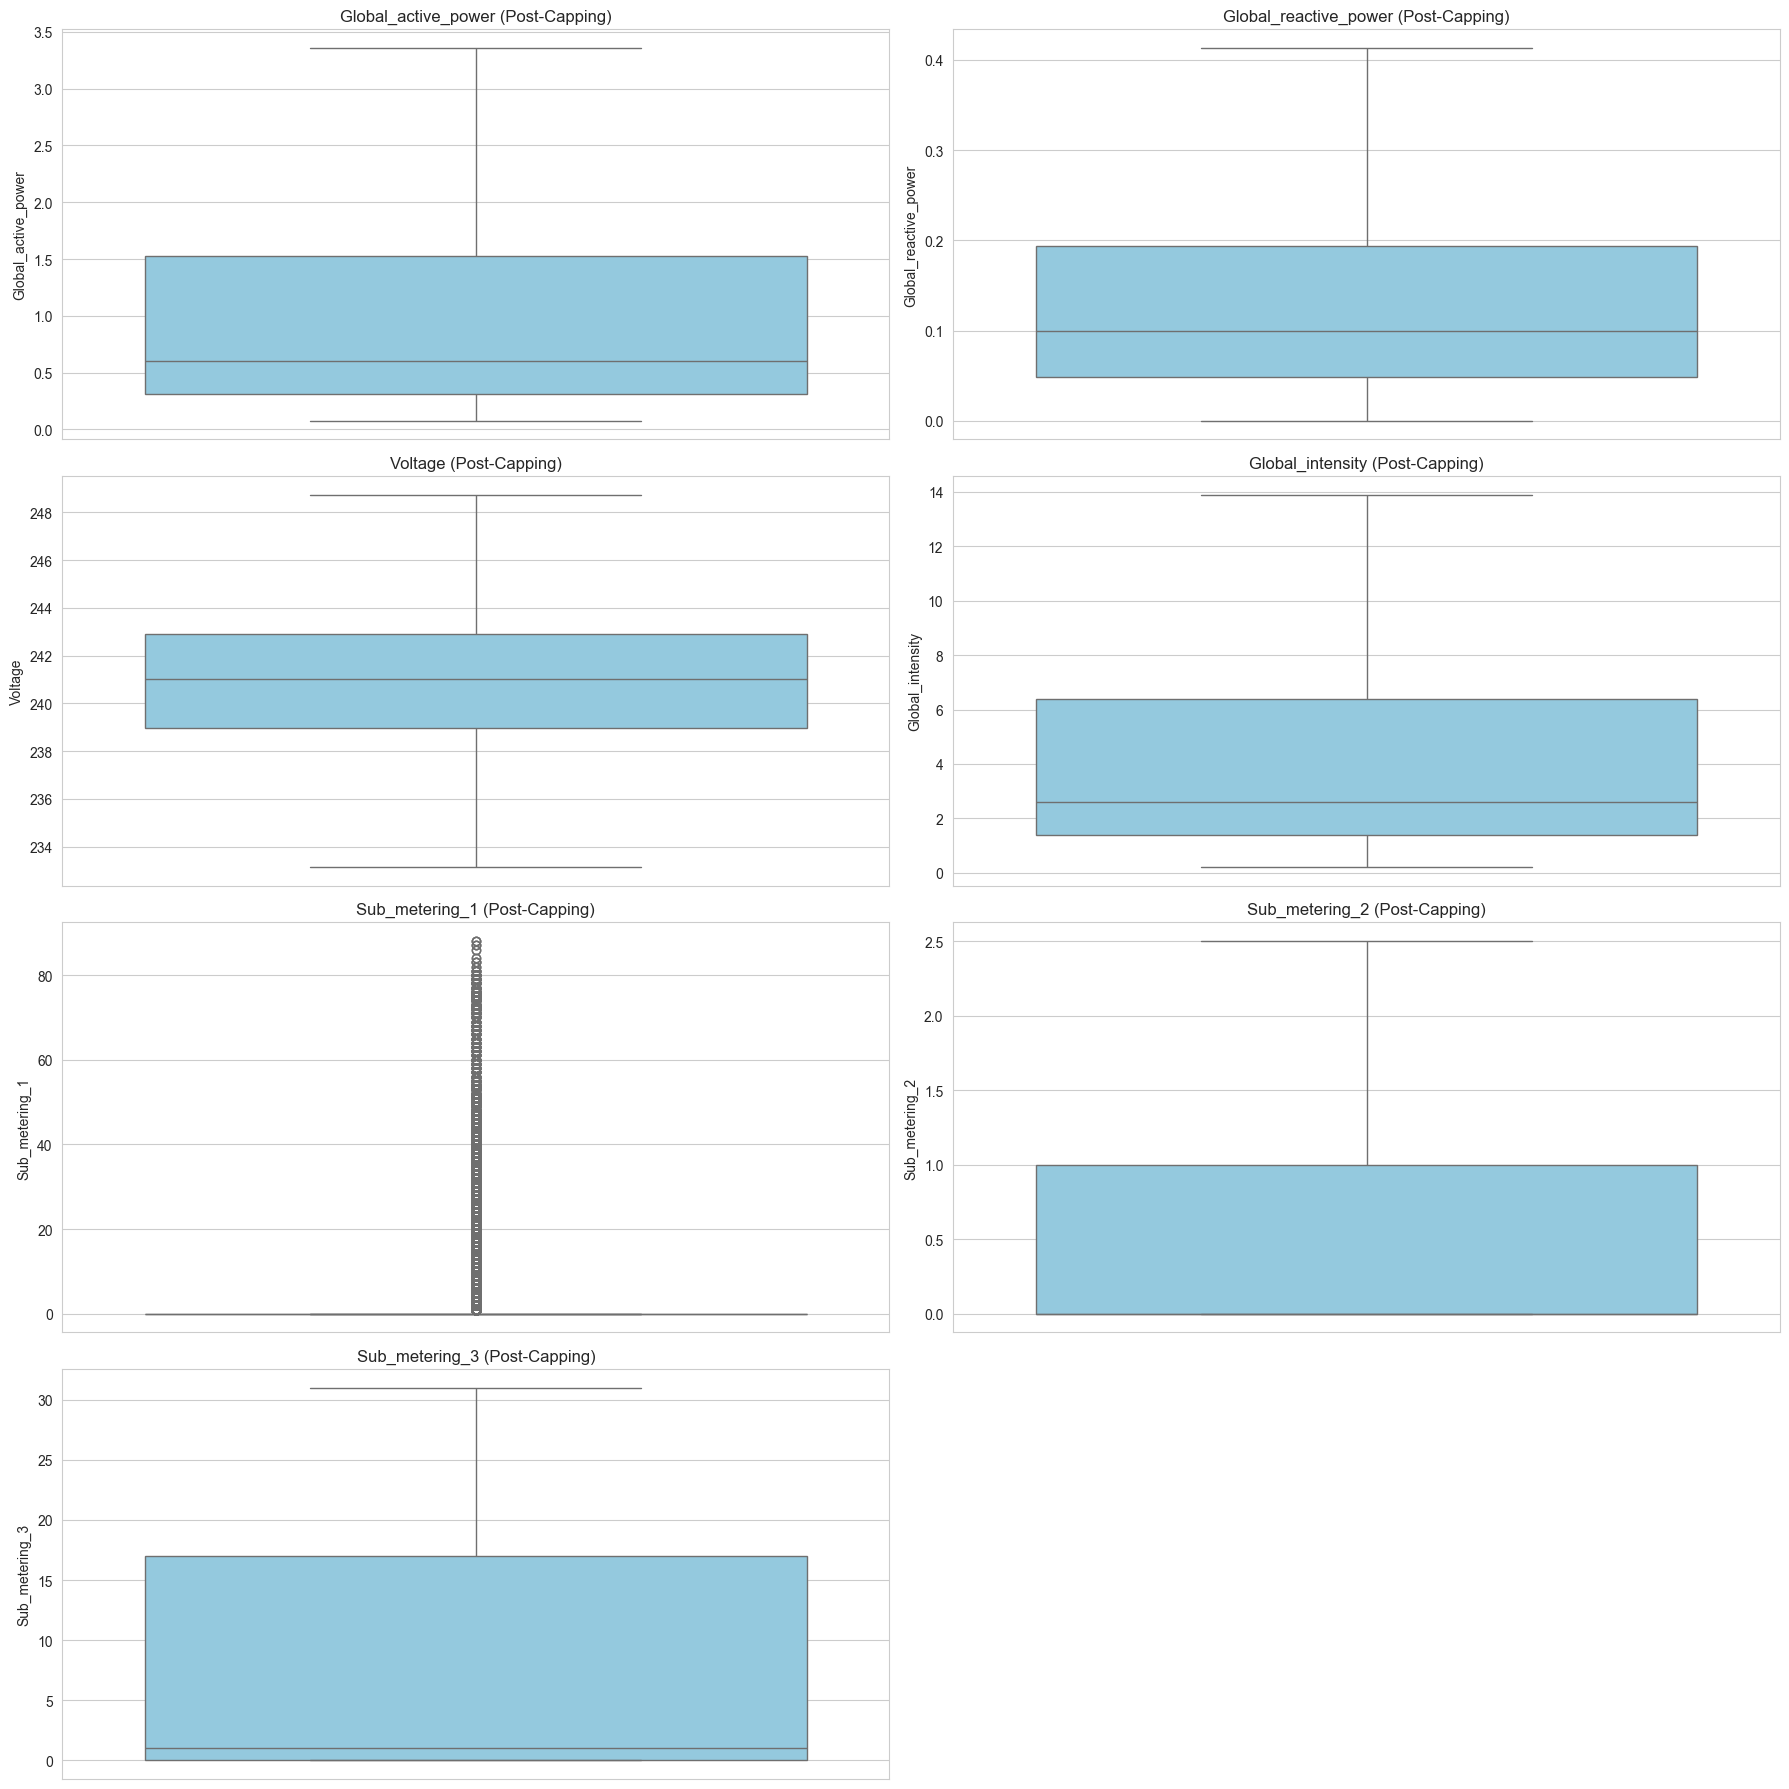

Min and Max values of the scaled columns:


NameError: name 'columns_to_scale' is not defined

In [ ]:
# List of columns to visualize
columns_to_plot = [
    'Global_active_power', 'Global_reactive_power', 'Voltage',
    'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'
]

# Set up the plot grid
plt.figure(figsize=(18, 18))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(data=df, y=col, color='skyblue')
    plt.title(f'{col} (Post-Capping)', fontsize=12)

plt.tight_layout()
plt.show()




Creation of additional features

In [31]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')  # If it's not already in datetime format
# Convert 'Time' to timedelta and add it to the 'Date' column
df['timestamp'] = df['Date'] + pd.to_timedelta(df['Time'])

# Now you can extract the hour, day of the week, and month
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Day', 'Month', 'Year', 'timestamp', 'hour',
       'day_of_week', 'month'],
      dtype='object')

In [32]:
df['global_active_power_lag_1'] = df['Global_active_power'].shift(1)
df['global_active_power_lag_24'] = df['Global_active_power'].shift(24)  # 24-hour lag
df['power_intensity_ratio'] = df['Global_intensity'] / df['Voltage']
df['sub_metering_ratio'] = df['Sub_metering_1'] / df['Sub_metering_3']
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Day', 'Month', 'Year', 'timestamp', 'hour',
       'day_of_week', 'month', 'global_active_power_lag_1',
       'global_active_power_lag_24', 'power_intensity_ratio',
       'sub_metering_ratio'],
      dtype='object')

In [33]:
from sklearn.model_selection import train_test_split

# Define your features and target
target = 'Global_active_power'
features = [
    'Global_reactive_power', 'Voltage', 'Global_intensity',
    'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3',
    'hour', 'day_of_week', 'month',
    'global_active_power_lag_1', 'global_active_power_lag_24',
    'power_intensity_ratio', 'sub_metering_ratio'
]

X = df[features]
y = df[target]

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [35]:
df.isna().sum()

Date                               0
Time                               0
Global_active_power                0
Global_reactive_power              0
Voltage                            0
Global_intensity                   0
Sub_metering_1                     0
Sub_metering_2                     0
Sub_metering_3                     0
Day                                0
Month                              0
Year                               0
timestamp                          0
hour                               0
day_of_week                        0
month                              0
global_active_power_lag_1          1
global_active_power_lag_24        24
power_intensity_ratio              0
sub_metering_ratio            813250
dtype: int64

In [36]:
df.dropna(subset=['global_active_power_lag_1', 'global_active_power_lag_24'], inplace=True)

Imputation

In [38]:
import numpy as np
from sklearn.impute import SimpleImputer

# Load data and treat '?' as NaN
data = pd.read_csv("household_power_consumption.csv", na_values='?')

# Combine Date and Time into a single datetime column
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H:%M:%S')
data.set_index('Datetime', inplace=True)

# Drop original Date and Time
data.drop(['Date', 'Time'], axis=1, inplace=True)

# Convert all columns to numeric (if any remain as object)
data = data.apply(pd.to_numeric, errors='coerce')

# Fill missing values using median strategy
imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns, index=data.index)

# Feature engineering: time-based features
data_imputed['hour'] = data_imputed.index.hour
data_imputed['day'] = data_imputed.index.day
data_imputed['month'] = data_imputed.index.month
data_imputed['weekday'] = data_imputed.index.weekday

Random Forest

In [41]:
from math import sqrt

# Instead of using squared=False
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)  # Manually compute RMSE

NameError: name 'mean_squared_error' is not defined

Random Forest

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Define target and features
X = data_imputed.drop(columns='Global_active_power')
y = data_imputed['Global_active_power']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=5, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ Random Forest Results:")
print(f"  RMSE: {rmse:.4f}")
print(f"  MAE: {mae:.4f}")
print(f"  R² Score: {r2:.4f}")

✅ Random Forest Results:
  RMSE: 0.0280
  MAE: 0.0129
  R² Score: 0.9993


Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression

# Use the same features and target from earlier
X = data_imputed.drop(columns='Global_active_power')
y = data_imputed['Global_active_power']

# Train/test split (reuse if already split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

# Evaluation
rmse_lr = sqrt(mean_squared_error(y_test, y_pred))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("📉 Linear Regression Results:")
print(f"  RMSE: {rmse_lr:.4f}")
print(f"  MAE: {mae_lr:.4f}")
print(f"  R² Score: {r2_lr:.4f}")

📉 Linear Regression Results:
  RMSE: 0.0280
  MAE: 0.0255
  R² Score: 0.9985


Gradient Boosting

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np  # Needed for RMSE

# Split your dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_reg.fit(X_train, y_train)

# Make predictions
y_pred = gb_reg.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 Gradient Boosting Regressor Evaluation:")
print(f"  MSE:  {mse:.4f}")
print(f"  RMSE: {rmse:.4f}")
print(f"  MAE:  {mae:.4f}")
print(f"  R²:   {r2:.4f}")

📊 Gradient Boosting Regressor Evaluation:
  MSE:  0.0012
  RMSE: 0.0340
  MAE:  0.0211
  R²:   0.9990


In [50]:
! pip install tensorflow


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Neural Networks

In [51]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np  # Needed for RMSE

# Define features and target
features = ['Global_reactive_power', 'Voltage', 'Global_intensity', 
            'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
target = 'Global_active_power'

# Drop rows with missing values
df = data[features + [target]].dropna()

X = df[features].values
y = df[target].values

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Regression output
])

# Compile
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train
model.fit(X_train, y_train, epochs=3, batch_size=32, validation_split=0.1)

# Predict and evaluate
y_pred = model.predict(X_test).flatten()

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 Neural Network Evaluation:")
print(f"  MSE:  {mse:.4f}")
print(f"  RMSE: {rmse:.4f}")
print(f"  MAE:  {mae:.4f}")
print(f"  R²:   {r2:.4f}")

c:\Users\sowmiya\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
46109/46109 ━━━━━━━━━━━━━━━━━━━━ 132s 3ms/step - loss: 0.0097 - mae: 0.0331 - val_loss: 0.0013 - val_mae: 0.0245
Epoch 2/3
46109/46109 ━━━━━━━━━━━━━━━━━━━━ 136s 3ms/step - loss: 0.0012 - mae: 0.0210 - val_loss: 0.0011 - val_mae: 0.0199
Epoch 3/3
46109/46109 ━━━━━━━━━━━━━━━━━━━━ 114s 2ms/step - loss: 0.0011 - mae: 0.0204 - val_loss: 0.0010 - val_mae: 0.0194
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step
📊 Neural Network Evaluation:
  MSE:  0.0010
  RMSE: 0.0321
  MAE:  0.0195
  R²:   0.9991


In [52]:
pip install scikeras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Perform hyperparameter tuning to optimize model performance.

In [53]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Split the data (if not already done)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
gb = GradientBoostingRegressor(random_state=42)

# Set up the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0]
}

# Grid search with 5-fold CV
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best model
best_gb = grid_search.best_estimator_

# Predict and evaluate
y_pred = best_gb.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Results
print("✅ Tuned Gradient Boosting Results:")
print(f"  Best Params: {grid_search.best_params_}")
print(f"  RMSE: {rmse:.4f}")
print(f"  MAE : {mae:.4f}")
print(f"  R²  : {r2:.4f}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits


KeyboardInterrupt: 

Model Evaluation

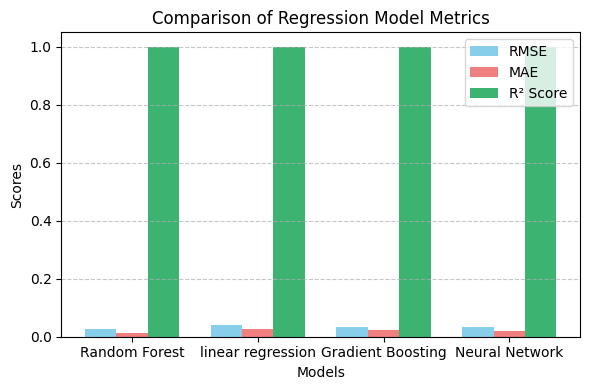

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Model names (order matters)
models = ['Random Forest','linear regression', 'Gradient Boosting', 'Neural Network']

# Insert your own values below:
rmse_scores = [0.0280,0.0403,0.0343,0.0330]   
mae_scores = [0.0129,0.0255,0.0215,0.0204]    
r2_scores  = [0.9993,0.9985,0.9990,0.9990]    

# Plotting
x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(6, 4))
plt.bar(x - width, rmse_scores, width, label='RMSE', color='skyblue')
plt.bar(x, mae_scores, width, label='MAE', color='lightcoral')
plt.bar(x + width, r2_scores, width, label='R² Score', color='mediumseagreen')

# Labels and formatting
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Regression Model Metrics')
plt.xticks(x, models)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()